In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
fl = pd.read_csv('E:Stanford Open Policing Project-FL/FL.csv')

C:\Users\sthom\AppData\Local\Temp\ipykernel_17744\3150667092.py:1: DtypeWarning: Columns (9,16,21,22,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  fl = pd.read_csv('E:Stanford Open Policing Project-FL/FL.csv')


In [3]:
fl.head(92)

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,search_type,contraband_found,stop_outcome,is_arrested,officer_id,officer_gender,officer_age,officer_race,officer_rank,out_of_state
0,FL-2010-000001,FL,2010-01-01,23:11,SARASOTA,Sarasota County,12115.0,NaN,NaN,F,...,NaN,NaN,Citation,NaN,1743,NaN,NaN,NaN,CPL,False
1,FL-2010-000002,FL,2010-01-01,23:11,SARASOTA,Sarasota County,12115.0,NaN,NaN,NaN,...,NaN,False,Citation,False,1743,M,NaN,NaN,NaN,NaN
2,FL-2010-000003,FL,2010-01-06,16:14,DUVAL,Duval County,12031.0,JACKSONVILLE,NaN,F,...,NaN,False,Citation,False,2138,M,31.0,Black,TROOPER,True
3,FL-2010-000004,FL,2010-01-08,19:39,DUVAL,Duval County,12031.0,JACKSONVILLE,NaN,F,...,NaN,False,Misdemeanor Arrest,True,2595,M,29.0,White,TPR,False
4,FL-2010-000005,FL,2010-01-11,11:56,ST. LUCIE,St. Lucie County,12111.0,NaN,NaN,M,...,NaN,False,Misdemeanor Arrest,True,2586,M,26.0,White,TPR.,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,FL-2010-000088,FL,2010-01-20,07:49,LEON,Leon County,12073.0,NaN,NaN,F,...,NaN,False,Citation,False,1886,M,NaN,White,CPL.,False
88,FL-2010-000089,FL,2010-01-20,08:30,LEON,Leon County,12073.0,NaN,NaN,F,...,NaN,False,Citation,False,1886,M,NaN,White,CPL.,False
89,FL-2010-000090,FL,2010-01-20,08:46,LEON,Leon County,12073.0,NaN,NaN,M,...,NaN,False,Citation,False,1886,M,NaN,White,CPL.,False
90,FL-2010-000091,FL,2010-01-20,09:02,LEON,Leon County,12073.0,NaN,NaN,M,...,NaN,False,Citation,False,1886,M,NaN,White,CPL.,False


### Exploratory

In [4]:
fl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5421446 entries, 0 to 5421445
Data columns (total 28 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   state                  object 
 2   stop_date              object 
 3   stop_time              object 
 4   location_raw           object 
 5   county_name            object 
 6   county_fips            float64
 7   fine_grained_location  object 
 8   police_department      float64
 9   driver_gender          object 
 10  driver_age_raw         float64
 11  driver_age             float64
 12  driver_race_raw        object 
 13  driver_race            object 
 14  violation_raw          object 
 15  violation              object 
 16  search_conducted       object 
 17  search_type_raw        object 
 18  search_type            object 
 19  contraband_found       object 
 20  stop_outcome           object 
 21  is_arrested            object 
 22  officer_id        

In [5]:
num_null = fl.isnull().sum()
num_null

id                             0
state                          0
stop_date                      0
stop_time                    214
location_raw                   1
county_name                  826
county_fips                  826
fine_grained_location    4186487
police_department        5421446
driver_gender            1316775
driver_age_raw           1319560
driver_age               1327591
driver_race_raw             1344
driver_race                 1345
violation_raw             419696
violation                 419686
search_conducted          419686
search_type_raw           423606
search_type              5392504
contraband_found          448628
stop_outcome               51626
is_arrested               419686
officer_id                     0
officer_gender            742232
officer_age               993878
officer_race             1250282
officer_rank             1316302
out_of_state             1314774
dtype: int64

In [6]:
fl.shape

(5421446, 28)

In [7]:
fl.columns

Index(['id', 'state', 'stop_date', 'stop_time', 'location_raw', 'county_name',
       'county_fips', 'fine_grained_location', 'police_department',
       'driver_gender', 'driver_age_raw', 'driver_age', 'driver_race_raw',
       'driver_race', 'violation_raw', 'violation', 'search_conducted',
       'search_type_raw', 'search_type', 'contraband_found', 'stop_outcome',
       'is_arrested', 'officer_id', 'officer_gender', 'officer_age',
       'officer_race', 'officer_rank', 'out_of_state'],
      dtype='object')

In [8]:
#percentage of null values
perct = (num_null / fl.shape[0]) * 100
perct

id                         0.000000
state                      0.000000
stop_date                  0.000000
stop_time                  0.003947
location_raw               0.000018
county_name                0.015236
county_fips                0.015236
fine_grained_location     77.220856
police_department        100.000000
driver_gender             24.288262
driver_age_raw            24.339632
driver_age                24.487766
driver_race_raw            0.024790
driver_race                0.024809
violation_raw              7.741403
violation                  7.741219
search_conducted           7.741219
search_type_raw            7.813524
search_type               99.466157
contraband_found           8.275062
stop_outcome               0.952255
is_arrested                7.741219
officer_id                 0.000000
officer_gender            13.690665
officer_age               18.332342
officer_race              23.061781
officer_rank              24.279537
out_of_state              24

### Reduce not needed columns

In [9]:
#drop columns with missing data greater than 25% or has duplicate data
fl = fl.drop(columns = ['fine_grained_location', 'police_department', 'driver_age_raw', 'driver_race_raw', 'violation_raw', 'search_type', 'state', 'county_name', 'county_fips'])

In [10]:
#diplay of columns now in dataframe
fl.columns

Index(['id', 'stop_date', 'stop_time', 'location_raw', 'driver_gender',
       'driver_age', 'driver_race', 'violation', 'search_conducted',
       'search_type_raw', 'contraband_found', 'stop_outcome', 'is_arrested',
       'officer_id', 'officer_gender', 'officer_age', 'officer_race',
       'officer_rank', 'out_of_state'],
      dtype='object')

In [11]:
(fl.isnull().sum()/fl.shape[0])*100

id                   0.000000
stop_date            0.000000
stop_time            0.003947
location_raw         0.000018
driver_gender       24.288262
driver_age          24.487766
driver_race          0.024809
violation            7.741219
search_conducted     7.741219
search_type_raw      7.813524
contraband_found     8.275062
stop_outcome         0.952255
is_arrested          7.741219
officer_id           0.000000
officer_gender      13.690665
officer_age         18.332342
officer_race        23.061781
officer_rank        24.279537
out_of_state        24.251353
dtype: float64

### Stop date 

In [12]:
fl.stop_date.describe()

count        5421446
unique          2488
top       2010-09-03
freq            4314
Name: stop_date, dtype: object

In [13]:
fl.stop_date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 5421446 entries, 0 to 5421445
Series name: stop_date
Non-Null Count    Dtype 
--------------    ----- 
5421446 non-null  object
dtypes: object(1)
memory usage: 41.4+ MB


In [14]:
fl.stop_date.min()

'2010-01-01'

In [15]:
fl.stop_date.max()

'2016-10-31'

In [16]:
print(fl.stop_date)

0          2010-01-01
1          2010-01-01
2          2010-01-06
3          2010-01-08
4          2010-01-11
              ...    
5421441    2016-10-31
5421442    2016-10-31
5421443    2016-10-31
5421444    2016-10-31
5421445    2016-10-31
Name: stop_date, Length: 5421446, dtype: object


### Driver age

In [17]:
fl.driver_age.describe().round()

count    4093855.0
mean          38.0
std           15.0
min           15.0
25%           26.0
50%           36.0
75%           48.0
max           99.0
Name: driver_age, dtype: float64

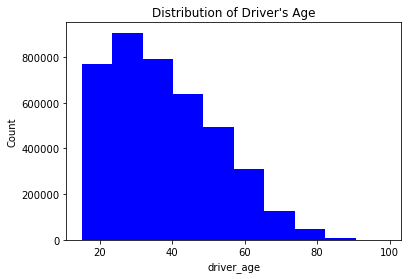

In [18]:
#distribution driver age
plt.hist(fl['driver_age'], bins=10, facecolor = 'b')
plt.xlabel('driver_age')
plt.ylabel('Count')
plt.title('Distribution of Driver\'s Age')
plt.show()

In [19]:
# number of NA values in driver_age
fl.driver_age.isna().sum()

1327591

In [20]:
fl.driver_age.value_counts()

21.0    131985
22.0    131939
23.0    129998
24.0    127066
25.0    125092
         ...  
95.0        35
97.0        15
99.0        13
96.0        10
98.0         9
Name: driver_age, Length: 85, dtype: int64

### driver age has a high amount of null values 1128897, filling values with the mean creates an unusually high concentration of persons of that age, which would skew any analysis following

#### As such we will eliminate all null values for the dataframe fl

### Eliminate rows with Null Values

In [21]:
#drop all rows with NaN values
fl.dropna(axis=0, inplace=True)

In [22]:
#no null values in dataframe
fl.isnull().sum().round()

id                  0
stop_date           0
stop_time           0
location_raw        0
driver_gender       0
driver_age          0
driver_race         0
violation           0
search_conducted    0
search_type_raw     0
contraband_found    0
stop_outcome        0
is_arrested         0
officer_id          0
officer_gender      0
officer_age         0
officer_race        0
officer_rank        0
out_of_state        0
dtype: int64

#### Returning to driver_age, for analysis

In [23]:
fl.driver_age.isnull().sum()

0

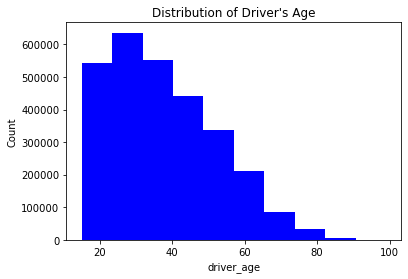

In [24]:
#distribution driver age
plt.hist(fl['driver_age'], bins=10, facecolor = 'b')
plt.xlabel('driver_age')
plt.ylabel('Count')
plt.title('Distribution of Driver\'s Age')
plt.show()

In [25]:
#reduced number of rows by droping na rows in fl
fl.driver_age.describe().round()

count    2843482.0
mean          38.0
std           15.0
min           15.0
25%           25.0
50%           35.0
75%           48.0
max           99.0
Name: driver_age, dtype: float64

In [26]:
fl.shape

(2843482, 19)

In [27]:
fl.columns

Index(['id', 'stop_date', 'stop_time', 'location_raw', 'driver_gender',
       'driver_age', 'driver_race', 'violation', 'search_conducted',
       'search_type_raw', 'contraband_found', 'stop_outcome', 'is_arrested',
       'officer_id', 'officer_gender', 'officer_age', 'officer_race',
       'officer_rank', 'out_of_state'],
      dtype='object')

### Location of stops

In [28]:
# location raw value counts
fl.location_raw.value_counts()

PALM BEACH    247968
ORANGE        218148
BROWARD       212491
MIAMI-DADE    195894
ST. LUCIE     143937
               ...  
GLADES          2944
GULF            2582
LAFAYETTE       2497
ST LUCIE         334
ST JOHNS         246
Name: location_raw, Length: 69, dtype: int64

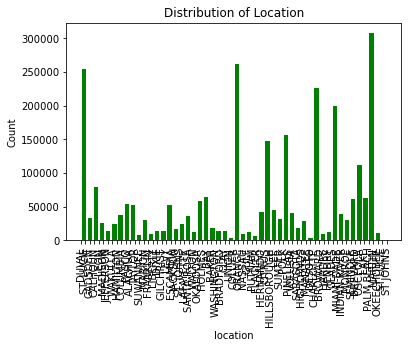

In [29]:

plt.hist(fl['location_raw'], bins=50, rwidth = .7, facecolor = 'g')
plt.xlabel('location')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.title('Distribution of Location')
plt.show()

### Officers Gender

In [30]:
# dataframe officer gender counts
gender = pd.DataFrame(fl.officer_gender.value_counts())
gender 

,officer_gender
M,2629584
F,213898


In [31]:
# male officer gender
ofcM = (fl['officer_gender'] == 'M').sum()
ofcM

2629584

In [32]:
# female officer gender
ofcF = (fl['officer_gender'] == 'F').sum()
ofcF

213898

In [33]:
# difference in officer genders
gender_diff = ofcM - ofcF
gender_diff

2415686

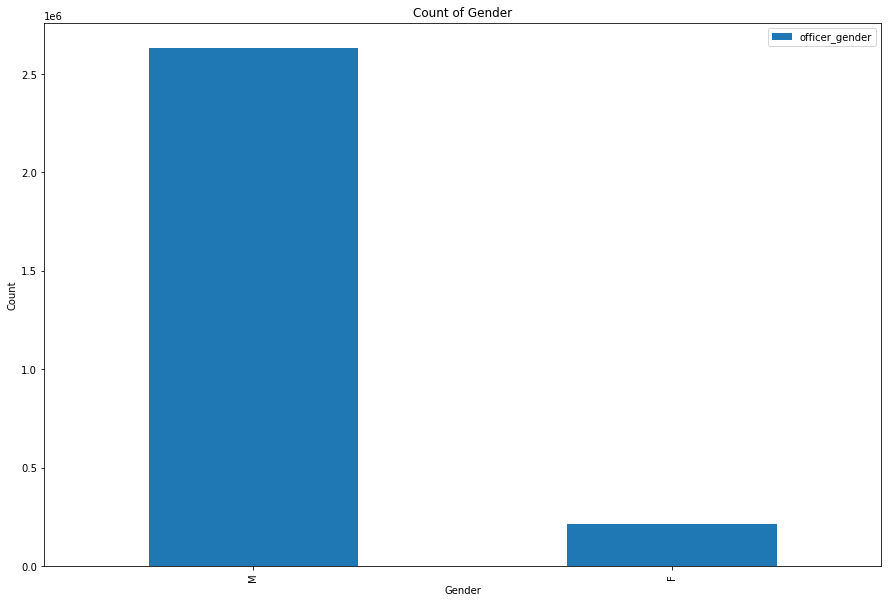

In [34]:
# barplot of officer gender
gender.plot.bar(figsize = (15, 10))
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Gender')
plt.show()

 ### Officer Age

In [35]:
round(fl.officer_age.describe())

count    2843482.0
mean          38.0
std           10.0
min           19.0
25%           30.0
50%           39.0
75%           46.0
max           66.0
Name: officer_age, dtype: float64

In [36]:
fl.officer_age.min()

19.0

In [37]:
fl.officer_age.max()

66.0

In [38]:
#ages below 18 are errors as must be at least 18 to be officer, and officers over 70 appear to outliers, these will be removed
fl = fl[fl['officer_age'] < 70]
fl = fl[fl['officer_age'] > 17]

In [39]:
#dataframe now reflects more accurate description of officer ages
fl.officer_age.describe().round()

count    2843482.0
mean          38.0
std           10.0
min           19.0
25%           30.0
50%           39.0
75%           46.0
max           66.0
Name: officer_age, dtype: float64

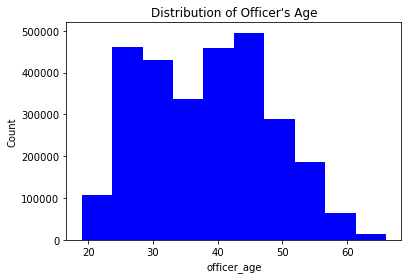

In [40]:
# histogram of officers ages
plt.hist(fl['officer_age'], bins=10, facecolor = 'b')
plt.xlabel('officer_age')
plt.ylabel('Count')
plt.title('Distribution of Officer\'s Age')
plt.show()

In [41]:
fl['officer_age'].isnull().sum()

0

In [42]:
#Officers ages
age = pd.DataFrame(fl.officer_age.value_counts())
age

,officer_age
44.0,103453
28.0,103251
45.0,103083
43.0,99587
46.0,98776
40.0,98205
41.0,96759
29.0,96390
27.0,95138
42.0,93864


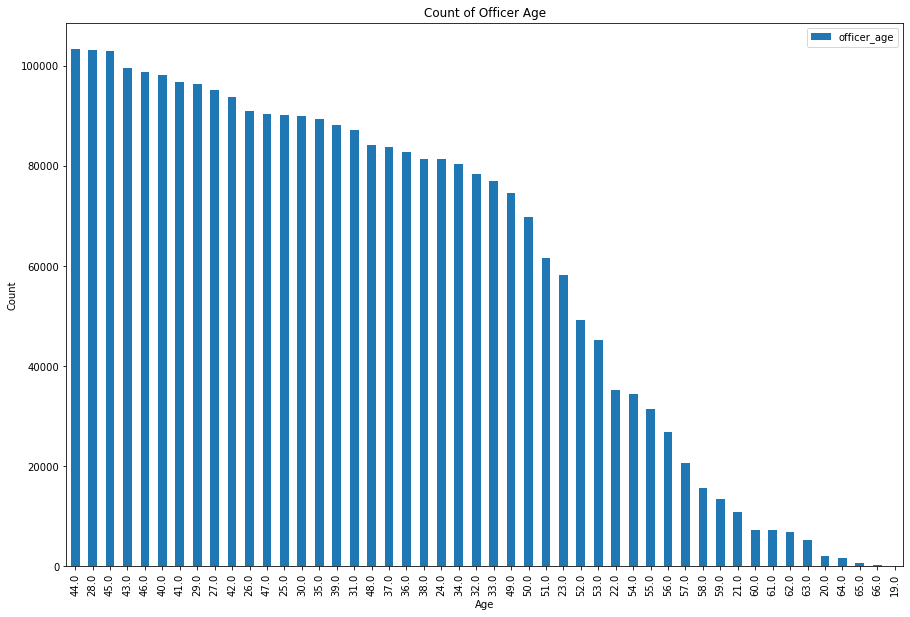

In [43]:
#bar plot of officers ages
age.plot.bar(figsize = (15, 10))
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Count of Officer Age')
plt.show()

### Officer Rank

In [44]:
# making all column variations of Trooper the same TPR
fl['officer_rank'] = fl['officer_rank'].replace(["TROOPER", "TPR.", "TPOOPER", "S-TROOPER"], "TPR") 

In [45]:
# changing column variations of sergeant, lt., sr. Trooper and corporal to abreviations of 
fl['officer_rank'] = fl['officer_rank'].replace(["SERGEANT", "LT.", "SR.TROOPER", "CORPORAL"], ["SGT", "LT", "SR TPR", "CPL"])

In [46]:
# making all column names of to abreviations
fl['officer_rank'] = fl['officer_rank'].replace(["LIEUTENANT", "OFFICER", "SERGEANT`", "SR TROOPER"], ["LT", "OFC", "SGT", "SR TPR"]) 

In [47]:
# checking for abreviations
fl['officer_rank']

2          TPR
3          TPR
4          TPR
8           LT
13         TRP
          ... 
4477924    SGT
4477925    TPR
4477927    TPR
4477928    TPR
4477929    TPR
Name: officer_rank, Length: 2843482, dtype: object

In [48]:
# checking column variables counts
rank = pd.DataFrame(fl.officer_rank.value_counts())
rank 

,officer_rank
TPR,2390178
SGT,178214
CPL,135851
OFC,66132
LT,22081
...,...
TPR1CLASS,2
W,1
STAFF SGT,1
SGT/1CLASS,1


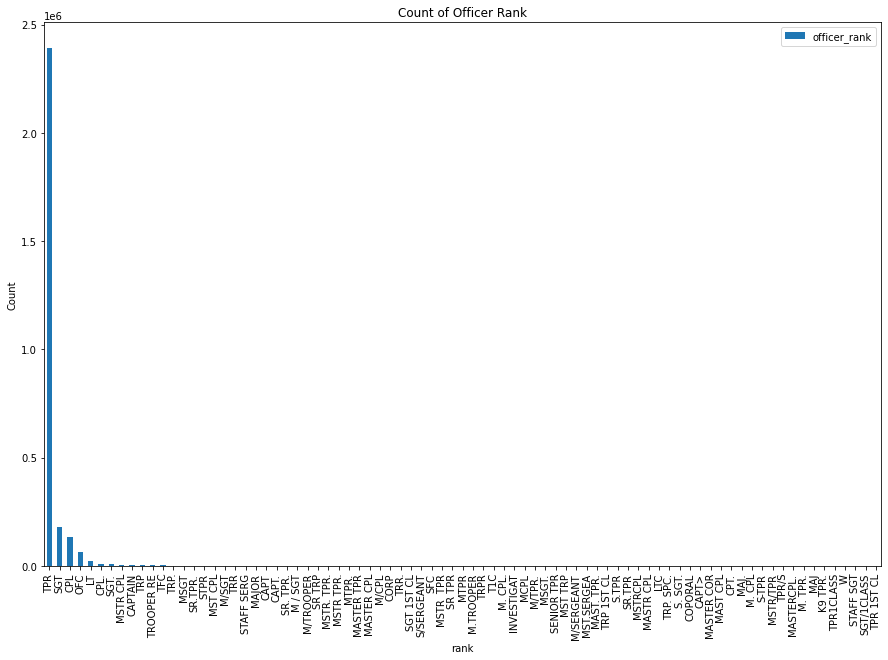

In [49]:
# bar plot of officer ranks
rank.plot.bar(figsize = (15, 10))
plt.xlabel('rank')
plt.ylabel('Count')
plt.title('Count of Officer Rank')
plt.show()

### Officer Race

In [50]:
# officer race counts
race = fl.officer_race.value_counts()
race

White       1973455
Black        426486
Hispanic     387255
Other         35094
Asian         21192
Name: officer_race, dtype: int64

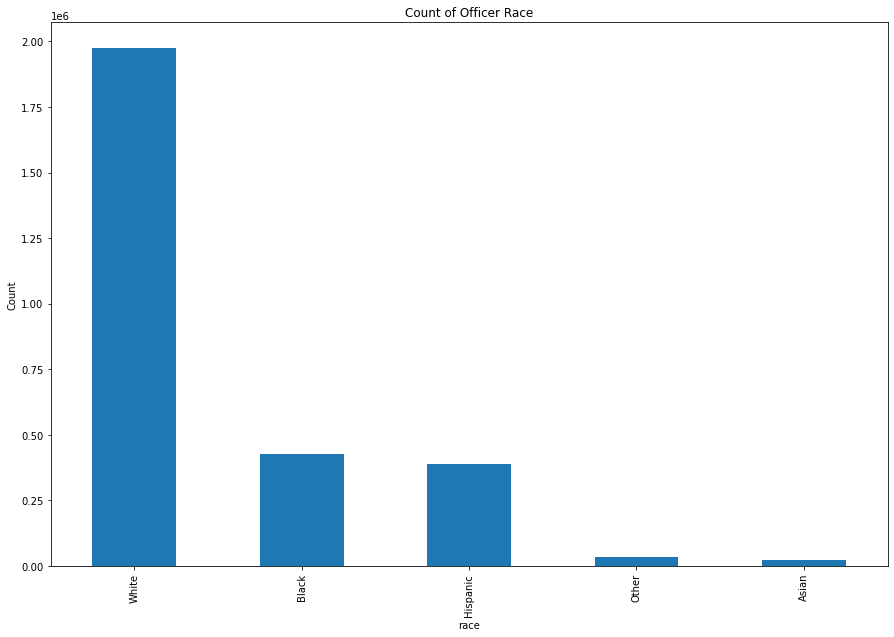

In [51]:
# bar plot of race counts
race.plot.bar(figsize = (15, 10))
plt.xlabel('race')
plt.ylabel('Count')
plt.title('Count of Officer Race')
plt.show()

<AxesSubplot:title={'center':'Percentage of Race'}>

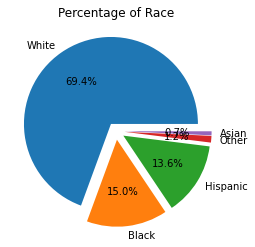

In [52]:
# pie chart of percentage of officer race
labels='White', 'Black', 'Hispanic', 'Other', 'Asian'
race.plot(kind='pie', figsize=(4,4), title='Percentage of Race', labels=labels, label='', explode=(0.1, 0.1, 0.1, 0.1, 0.1), autopct='%1.1f%%')



### Stop outcome

In [53]:
# stop outcome variable counts
outcome = fl.stop_outcome.value_counts()
outcome

Citation                   2112597
Warning                     569037
Misdemeanor Arrest           88482
Faulty Equipment Notice      68167
Felony Arrest                 5199
Name: stop_outcome, dtype: int64

<AxesSubplot:title={'center':'Percentage of Stop Outcomes'}>

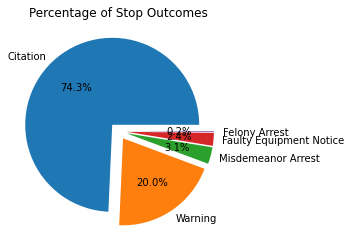

In [54]:
# pie chart of percentages of stop outcomes
labels='Citation', 'Warning', 'Misdemeanor Arrest', 'Faulty Equipment Notice', 'Felony Arrest'
outcome.plot(kind='pie', figsize=(4,4), title='Percentage of Stop Outcomes', labels=labels, label='', explode=(0.1, 0.1, 0.1, 0.1, 0.1), autopct='%1.1f%%')

In [55]:
#percentage of stop outcomes, rounded
pctoutcome = round((fl.stop_outcome.value_counts()/fl.shape[0])*100)
pctoutcome

Citation                   74.0
Warning                    20.0
Misdemeanor Arrest          3.0
Faulty Equipment Notice     2.0
Felony Arrest               0.0
Name: stop_outcome, dtype: float64